In [1]:
import os
import glob
import pandas as pd
import numpy as np

In [4]:
alpha = pd.read_csv('/fs/ess/PAS0439/MING/virome/checkv_trimmed_for_dowmstream/ecology/alpha_diversity.csv')

In [5]:
alpha

,id,shannon,simpson,richness
0,D500,4.325749,0.979983,118
1,D501,4.080271,0.975219,99
2,D502,4.575180,0.986450,130
3,D503,3.874097,0.956416,78
4,D504,3.969092,0.972274,79
...,...,...,...,...
970,Yak.DX02,7.573362,0.999092,3047
971,Yak.DX03,6.751948,0.998291,1228
972,Yak.MQ01,7.095319,0.998396,1939
973,Yak.MQ02,7.055807,0.998327,1859


In [6]:
metadata = pd.read_csv('/fs/scratch/PAS0439/metadata.csv')

In [7]:
metadata

,id,species,beef_or_dairy,grazing_or_not,collection_method,geography,project,file_path
0,ERR2027889,Bos_taurus,beef,no,slau,UK,PRJEB21624,/fs/ess/PAS0439/MING/virome/virus_contigs_keep...
1,ERR2027890,Bos_taurus,beef,no,slau,UK,PRJEB21624,/fs/ess/PAS0439/MING/virome/virus_contigs_keep...
2,ERR2027891,Bos_taurus,beef,no,slau,UK,PRJEB21624,/fs/ess/PAS0439/MING/virome/virus_contigs_keep...
3,ERR2027892,Bos_taurus,beef,no,slau,UK,PRJEB21624,/fs/ess/PAS0439/MING/virome/virus_contigs_keep...
4,ERR2027893,Bos_taurus,beef,no,slau,UK,PRJEB21624,/fs/ess/PAS0439/MING/virome/virus_contigs_keep...
...,...,...,...,...,...,...,...,...
970,SRR12529377,Capra_hircus,na,no,slau,China,PRJNA657455,/fs/ess/PAS0439/MING/virome/virus_contigs_keep...
971,SRR12529378,Capra_hircus,na,no,slau,China,PRJNA657455,/fs/ess/PAS0439/MING/virome/virus_contigs_keep...
972,SRR12529379,Capra_hircus,na,no,slau,China,PRJNA657455,/fs/ess/PAS0439/MING/virome/virus_contigs_keep...
973,SRR12529380,Capra_hircus,na,no,slau,China,PRJNA657455,/fs/ess/PAS0439/MING/virome/virus_contigs_keep...


In [10]:
os.chdir('/fs/ess/PAS0439/MING/virome/checkv_trimmed_for_dowmstream/AMR/metagenome/')

In [26]:
files = glob.glob('*.txt')

In [27]:
mapping_rate = {}
for file in files:
    sample = file.split('.txt')[0]
    mapping = []
    with open(file, 'r') as file:
        lines = file.readlines()
        count = 0
        for line in lines:
            count += 1
            if count == 1:
                continue
            else:
                coverage = float(line.split()[1])
            
                mapping.append(coverage)
        mapping = int(sum(mapping))
        mapping_rate[sample] = mapping
        

In [36]:
mapping_df = pd.DataFrame.from_dict(mapping_rate, orient='index').reset_index()

In [39]:
mapping_df.rename(columns={'index': 'id', 0: 'mapping'}, inplace=True)

In [44]:
data_corr = pd.merge(mapping_df, alpha, left_on='id', right_on= 'id')

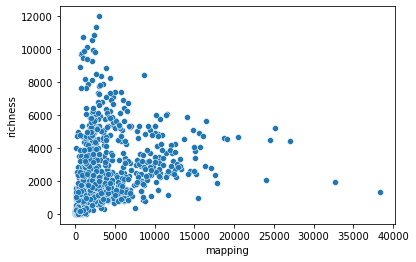

In [45]:
import seaborn as sns
sns.scatterplot(x="mapping", y="richness", data= data_corr);

In [47]:
data_corr.corr()

,mapping,shannon,simpson,richness
mapping,1.000000,0.254646,0.141343,0.269824
shannon,0.254646,1.000000,0.600697,0.788420
simpson,0.141343,0.600697,1.000000,0.299389
richness,0.269824,0.788420,0.299389,1.000000
